In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
train = pd.read_csv("/home/ahrzb/.kaggle/competitions/titanic/train.csv", index_col='PassengerId')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [183]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collander, Mr. Erik Gustaf",male,347082,B96 B98,S
freq,1,577,7,4,644


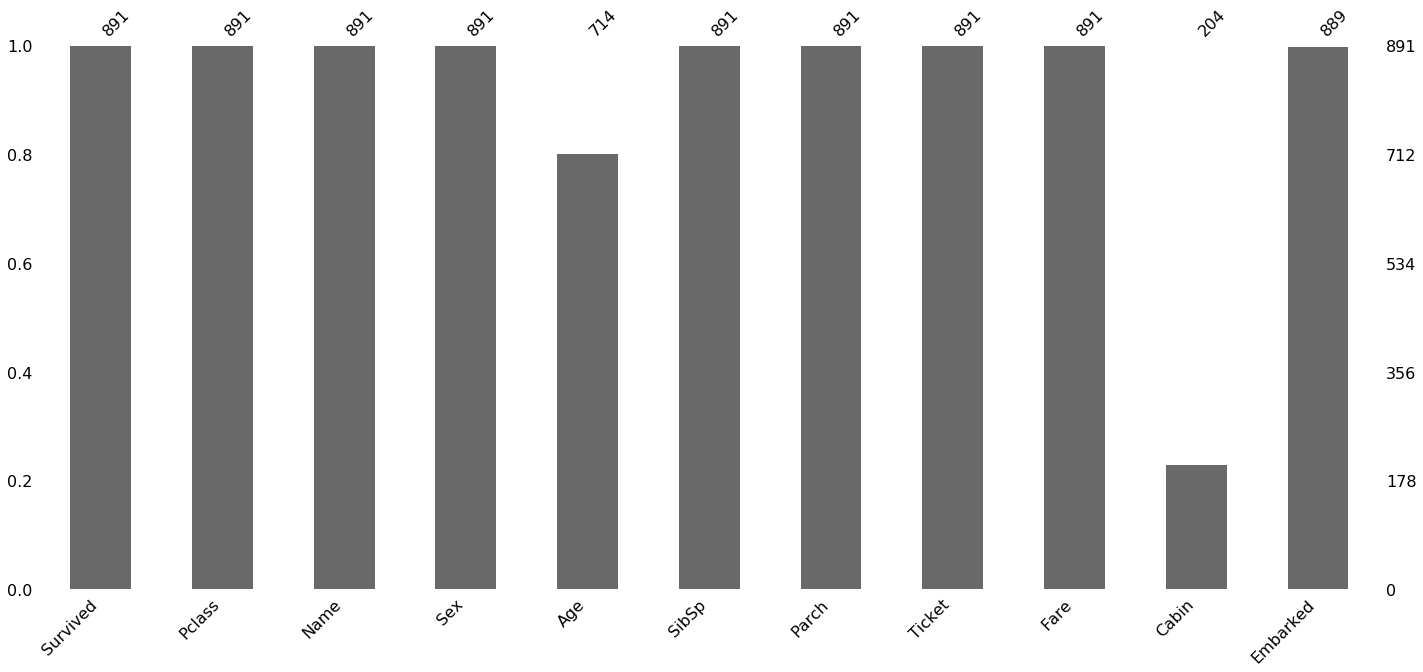

In [11]:
msno.bar(train)

/home/ahrzb/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


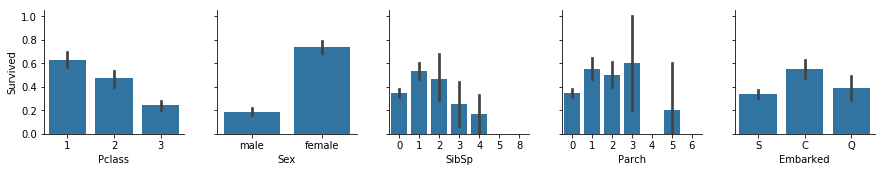

In [278]:
g = sns.PairGrid(
    train, 
    x_vars=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],
    y_vars=['Survived']
)
g.map(sns.barplot)

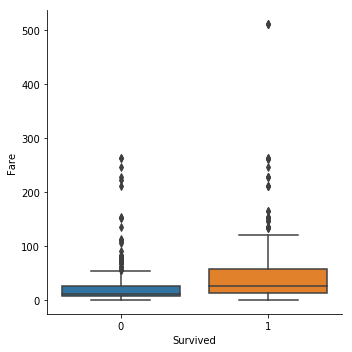

In [291]:
sns.catplot('Survived', 'Fare', data=train, kind='box')

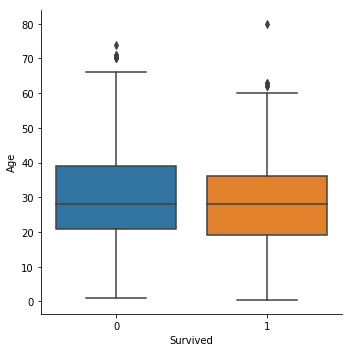

In [302]:
sns.catplot('Survived', 'Age', data=train, kind='box')

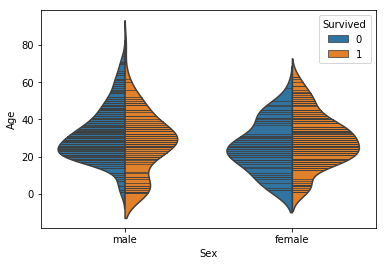

In [318]:
sns.violinplot(x='Sex', y='Age', hue='Survived', inner="stick", split=True, data=train)

/home/ahrzb/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


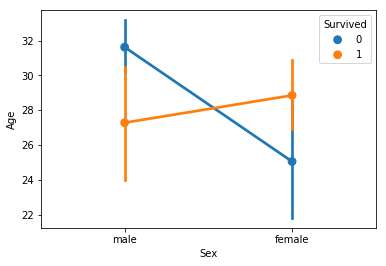

In [323]:
sns.pointplot(x='Sex', y='Age', hue='Survived', data=train)

In [324]:
train['FamilySize'] = train.SibSp + train.Parch + 1

In [341]:
train[train.FamilySize > 5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Mr,7
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Master,6
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Mrs,7
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,6
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,Master,6
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,Master,8
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,Master,6
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Miss,7
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,Miss,8


/home/ahrzb/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


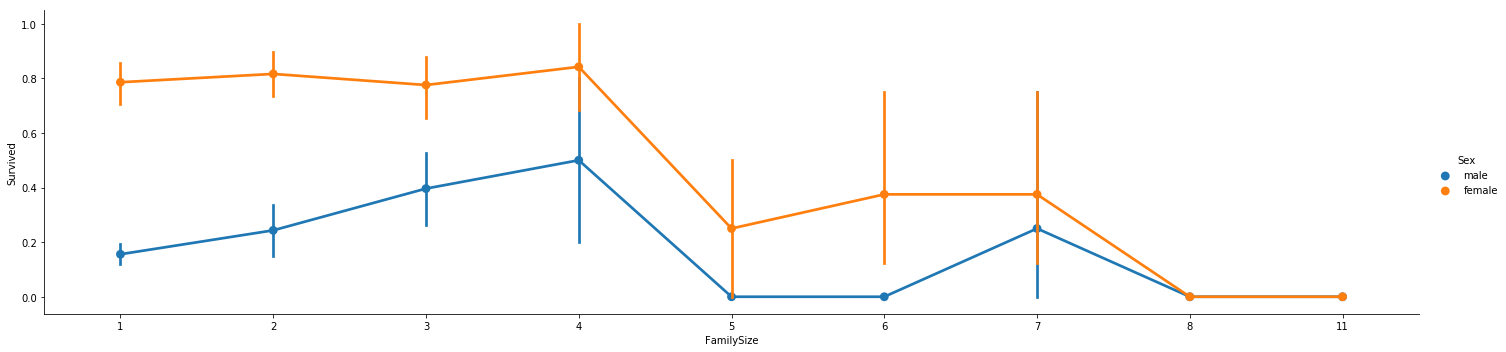

In [340]:
sns.catplot('FamilySize', 'Survived', hue='Sex', data=train, kind='point', aspect=4)

In [12]:
import dtreeviz

In [14]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

In [20]:


regr = tree.DecisionTreeRegressor(max_depth=5)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(
    regr,
    boston.data,
    boston.target,
    target_name='price',
    feature_names=boston.feature_names
)

In [19]:
viz.view()

In [59]:
df = train.copy().drop(['Name', 'Ticket', 'Cabin'], axis='columns')
df.Embarked = df.Embarked.astype('category').cat.codes
df.Sex = df.Sex.astype('category').cat.codes
df = df.fillna(df.mean())
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [62]:
classifier = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
classifier.fit(df.drop('Survived', axis='columns'), df.Survived)

viz = dtreeviz(
   classifier, 
   df.drop('Survived', axis=1), 
   df.Survived,
   target_name='variety',
   feature_names=df.drop('Survived', axis='columns').columns, 
   class_names=['Survived', 'Not Survived']
)
              
viz.view() 